<img src="show/Tapa Presentacion.png">

# Registro de Lluvia - Corral de Bustos, Córdoba

En este proyecto vamos a proceder a digitalizar y analizar registros pluviales de la localidad de Corral de Bustos, Córdoba, Argentina.
Los registros existentes se encuentran en papel, por lo tanto la carga de los mismos se hará de forma manual.

Luego de la carga y organización de los datos procederemos a realizar algunos análisis con el fin de aportar algo de información acerca de los patrones de lluvia históricos, máximos ocurridos, etc.

## Carga de datos

Los datos disponibles provienen de dos fuentes: 
- Registros de la Familia Ruffo: contiene información que data del año 1906.
- Registros de Daniel Terissi: contiene información recopilada desde el año 2006 hasta la actualidad (2020).

En ambos casos utilizaremos solo los registros de precipitaciones recogidas de forma mensual. Descartando otros datos como precipitaciones diarias y días en que se produjeron heladas. Estos datos, si bien confiables, se encuentran solo en una pequeña porción de los registros y, por consiguiente, no nos permitirían realizar un análisis representativo.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
            'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']


### Registros Familia Ruffo
Cada elemento del tuple es una lista (año) conteniendo 12 valores que representan las 
precipitaciones ocurridas cada mes.
Los años incluídos van desde 1906 a 2005 inclusive.

In [26]:
raw_data_ruffo = (
    [104,19,67,18,8,0,38,51,14,54,54,89],
    [36,106,58,46,13,0,7,46,31,79,137,152],
    [20,29,109,11,41,51,13,3,50,143,195,77],
    [3,73,22,78,5,2,14,15,133,42,58,85],
    [46,64,97,25,30,0,0,0,26,62,62,48],
    [95,103,21,1,68,0,52,60,18,14,88,201],
    [122,84,17,143,47,9,15,77,0,69,148,104],
    [45,73,128,48,10,3,0,124,32,50,146,89],
    [67,67,47,388,73,23,69,61,24,89,83,222],
    [89,116,80,132,6,0,0,2,80,107,91,89],
    [73,94,68,69,17,16,1,27,0,12,31,91],
    [55,51,146,153,6,9,62,0,2,40,33,46],
    [157,46,44,15,3,69,0,3,81,120,118,13],
    [87,159,132,92,34,11,97,4,64,82,77,213],
    [138,176,160,31,21,1,18,4,30,85,112,93],
    [106,127,157,63,4,17,6,2,43,79,139,35],
    [72,46,57,35,204,48,2,86,55,123,162,102],
    [8,71,173,64,9,55,20,57,8,74,57,68],
    [172,80,179,68,6,0,7,0,83,63,33,88],
    [53,129,133,13,53,0,118,24,68,77,28,72],
    [56,68,135,90,67,34,66,55,7,55,202,119],
    [33,53,226,23,37,9,39,24,30,105,82,111],
    [267,13,11,18,82,0,48,15,136,108,142,175],
    [132,151,70,13,0,10,0,0,112,81,60,74],
    [149,115,140,81,110,16,10,12,73,83,69,237],
    [153,121,52,35,57,0,0,68,49,120,155,122],
    [20,68,147,105,25,0,103,24,64,32,90,94],
    [116,102,171,47,33,0,0,0,11,186,77,47],
    [44,21,182,59,8,24,65,20,111,108,253,58],
    [75,31,58,33,0,0,0,13,19,167,106,65],
    [42,71,14,18,11,63,9,0,38,103,65,24],
    [24,123,58,44,34,3,0,3,127,40,23,20],
    [80,82,185,150,88,14,0,2,10,140,79,22],
    [122,368,46,45,5,20,0,45,166,308,50,82],
    [245,59,57,214,0,40,52,47,94,61,83,426],
    [61,138,192,61,18,0,107,0,0,92,135,104],
    [123,173,44,48,14,9,0,95,0,81,71,37],
    [12,15,160,46,107,71,63,14,14,78,267,30],
    [126,123,152,65,119,0,0,0,16,162,72,73],
    [21,210,72,81,0,0,11,6,167,36,65,148],
    [55,4,190,69,69,29,8,27,44,67,150,178],
    [219,100,233,196,0,5,20,0,51,24,151,61],
    [341,47,297,13,46,10,7,2,55,7,43,177],
    [95,101,124,39,22,17,136,9,49,85,75,64],
    [37,43,127,24,54,11,23,4,72,162,101,166],
    [142,171,55,20,14,0,2,25,5,42,94,87],
    [45,32,100,6,38,37,39,18,95,122,50,37],
    [184,70,173,36,3,75,0,4,2,108,123,159],
    [92,25,124,139,36,33,58,70,63,62,36,63],
    [92,253,117,65,48,0,4,4,5,128,114,103],
    [335,185,133,95,65,65,2,40,15,195,60,15],
    [91,129,13,124,100,37,10,0,30,22,168,244],
    [93,239,119,36,9,30,111,22,19,2,89,122],
    [44,181,74,113,31,460,0,9,39,119,133,40],
    [104,53,124,32,0,22,9,3,80,301,119,47],
    [93,77,190,83,0,7,0,11,31,103,244,234],
    [81,16,149,76,13,0,80,39,6,25,90,72],
    [89,58,173,90,23,35,0,2,43,125,68,183],
    [83,125,303,76,24,3,5,36,65,19,75,127],
    [63,39,37,68,3,135,7,0,11,134,92,163],
    [44,63,421,74,2,6,17,4,4,7,6,104],
    [87,55,70,154,15,3,28,32,70,293,67,86],
    [45,96,99,0,3,46,0,24,33,107,46,146],
    [23,128,101,157,148,29,35,0,25,33,128,35],
    [126,194,308,0,51,28,22,0,28,114,83,143],
    [177,261,166,118,25,2,80,23,95,92,24,66],
    [124,105,70,25,5,29,22,96,108,102,54,158],
    [151,145,235,100,18,141,60,0,0,154,61,120],
    [62,0,38,0,45,0,150,10,18,87,60,90],
    [102,113,264,58,66,41,4,55,138,32,98,38],
    [305,267,39,66,60,0,60,99,0,131,206,226],
    [197,236,73,10,17,53,27,35,50,160,82,201],
    [80,69,340,10,4,16,67,11,165,126,101,149],
    [167,112,112,61,0,21,50,1,69,39,254,87],
    [0,78,97,61,42,38,5,0,18,96,149,80],
    [287,28,105,205,28,2,23,0,8,44,163,106],
    [110,216,61,80,11,18,8,0,93,154,145,72],
    [139,100,44,20,93,5,3,22,17,81,82,88],
    [46,352,59,39,12,9,3,15,66,48,198,76],
    [44,116,24,25,6,0,64,51,67,153,59,143],
    [315,64,88,20,47,26,2,20,58,88,157,98],
    [97,128,159,42,145,0,20,23,26,70,122,158],
    [201,45,274,23,7,0,32,4,45,35,28,61],
    [41,33,134,58,49,33,3,22,19,54,68,145],
    [127,154,133,85,80,0,94,7,13,129,226,258],
    [152,57,165,67,81,38,26,67,13,31,72,432],
    [37,38,124,29,15,9,0,67,136,75,269,134],
    [181,63,46,235,180,34,3,34,87,169,157,238],
    [101,100,41,71,62,25,13,32,7,126,59,133],
    [128,83,136,66,30,4,0,4,49,85,105,34],
    [65,66,110,143,33,0,0,4,13,44,55,133],
    [197,54,46,99,12,64,21,11,24,67,151,165],
    [246,129,52,68,51,8,16,13,5,42,198,104],
    [46,143,218,71,14,24,6,13,40,58,33,117],
    [119,87,53,160,76,2,2,4,3,128,189,37],
    [77,22,321,100,0,33,0,35,115,76,50,121],
    [137,53,136,118,56,6,13,48,20,183,240,326],
    [55,83,218,119,31,4,65,27,6,33,82,185],
    [145,41,95,115,95,0,61,22,0,126,94,146],
    [186,121,71,60,4,20,12,43,64,103,102,58]
)

# Creamos dict con años como keys y lista de meses como values.
raw_data_ruffo_dict = {}
years = np.arange(1906, 2006)
for i in range(len(years)):
    year = years[i]
    raw_data_ruffo_dict[year] = raw_data_ruffo[i]

### Registros Daniel Terissi
El dict se crea con la misma estructura que el anterior.
La información abarca desde el año 2006 hasta 2019 inclusive.

Hay dos años de los que no se posee información alguna, 2008 y 2013.

In [27]:
raw_data_papa = {
        
    2006: [65,202,70,216,0,10,0,0,13,104,138,164],
    2007: [115,206,189,31,26,19,9,0,116,68,37,122],
    2009: [86,195,71,21,30,0,40,10,125,41,80,305],
    2010: [193,166,61,58,63,0,0,0,97,85,77,101],
    2011: [34,96,42,78,17,10,0,10,11,139,68,28],
    2012: [114,330,234,30,46,2,0,67,116,298,162,146],
    2014: [147,332,119,172,39,6,0,2,58,56,123,115],
    2015: [122,169,207,130,37,3,48,119,51,52,268,98],
    2016: [184,354,44,133,3,65,5,2,18,164,40,120],    
    2017: [109,94,172,177,106,24,17,17,96,50,46,134],
    2018: [74,0,2,208,70,6,6,0,8,83,178,110],
    2019: [197,37,113,75,63,35,12,0,12,61,61,181]
}

In [28]:
# Combinamos ambos dicts
raw_data_combined = {**raw_data_ruffo_dict, **raw_data_papa}

In [29]:
# Creamos DataFrame
data = pd.DataFrame.from_dict(raw_data_combined, orient='index', columns=months)
# Nueva columna, precipitaciones totales por año
data['Total'] = data.sum(axis=1)

In [30]:
data.head(10)

,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Total
1906,104,19,67,18,8,0,38,51,14,54,54,89,516
1907,36,106,58,46,13,0,7,46,31,79,137,152,711
1908,20,29,109,11,41,51,13,3,50,143,195,77,742
1909,3,73,22,78,5,2,14,15,133,42,58,85,530
1910,46,64,97,25,30,0,0,0,26,62,62,48,460
1911,95,103,21,1,68,0,52,60,18,14,88,201,721
1912,122,84,17,143,47,9,15,77,0,69,148,104,835
1913,45,73,128,48,10,3,0,124,32,50,146,89,748
1914,67,67,47,388,73,23,69,61,24,89,83,222,1213
1915,89,116,80,132,6,0,0,2,80,107,91,89,792


In [31]:
# Corroboramos que no tenemos null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 1906 to 2019
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Enero       112 non-null    int64
 1   Febrero     112 non-null    int64
 2   Marzo       112 non-null    int64
 3   Abril       112 non-null    int64
 4   Mayo        112 non-null    int64
 5   Junio       112 non-null    int64
 6   Julio       112 non-null    int64
 7   Agosto      112 non-null    int64
 8   Septiembre  112 non-null    int64
 9   Octubre     112 non-null    int64
 10  Noviembre   112 non-null    int64
 11  Diciembre   112 non-null    int64
 12  Total       112 non-null    int64
dtypes: int64(13)
memory usage: 12.2 KB


## Exploración inicial


In [32]:
# Aplicando Seaborn settings
sns.set_style('white')
sns.set_palette('deep')

### Precipitaciones anuales

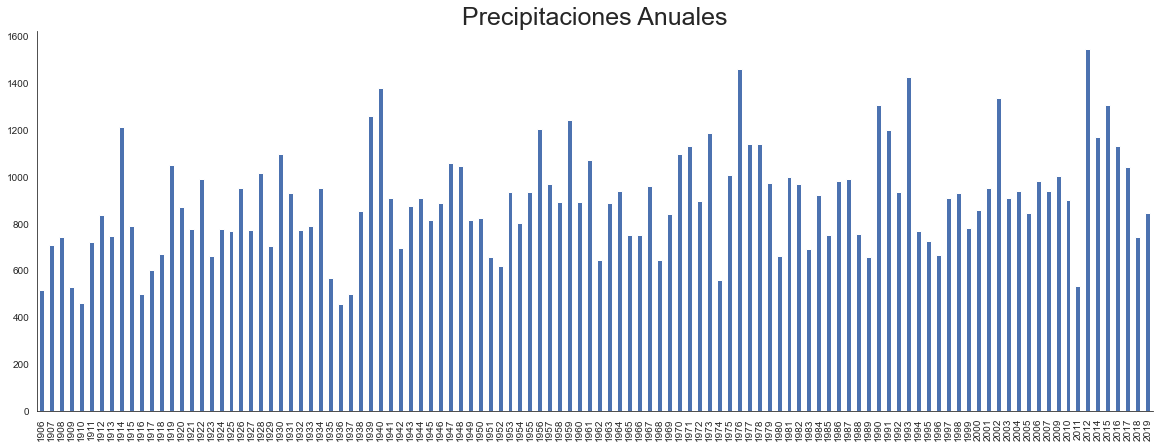

In [33]:
# Gráfico de barras, precipitaciones totales por año
data.Total.plot.bar(figsize=(20,7))
sns.despine()
plt.title('Precipitaciones Anuales', fontsize=25)
plt.show()

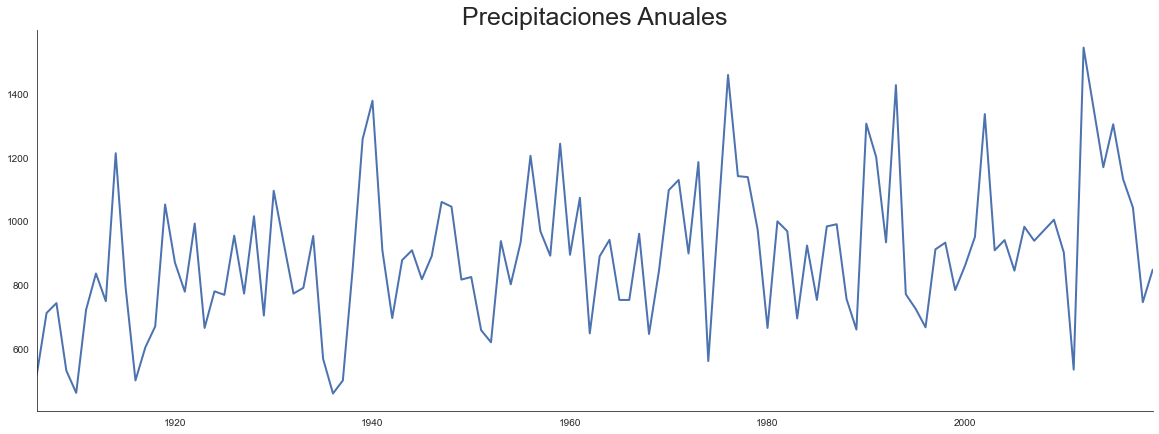

In [34]:
# Gráfico de línea, precipitaciones totales por año
data.Total.plot.line(figsize=(20,7), linewidth=2)
sns.despine(right=True)
plt.title('Precipitaciones Anuales', fontsize=25)
plt.xlim(1906, 2019)
# Utilizar esta línea para exportar gráfico como imagen
plt.savefig('show/Precipitaciones Anuales(Grafico de Linea).png', dpi=400, bbox_inches='tight')

In [35]:
# Promedio anual
data.Total.mean()

893.1785714285714

In [36]:
# Año de precipitaciones máximas
data[data.Total == data.Total.max()].Total

2012    1545
Name: Total, dtype: int64

In [37]:
# Año de precipitaciones mínimas
data[data.Total == data.Total.min()].Total

1936    458
Name: Total, dtype: int64

El registro anual muestra una oscilación sin patrones aparentes. Se observa un progresivo aumento de lluvias en términos generales.

- El promedio de lluvias anuales es de 893mm.
- El año con menos precipitaciones fue 1936 con 458mm.
- El año con más precipitaciones fue 1012 con 1545mm.

### Promedio mensual de precipitaciones


In [38]:
my_palette = ['#043565', '#729CE9', '#92d784']
sns.set_palette(my_palette)

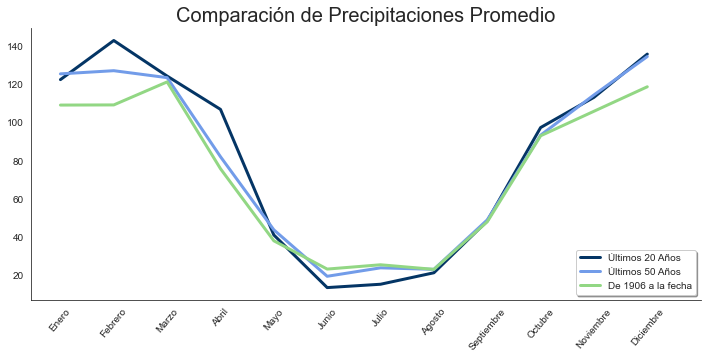

In [39]:
# Promedio de lluvias mensuales. Desde 1906, 50 años y 25 años.
month_avg = data.drop('Total', axis=1).mean()
month_avg_50 = data.tail(50).drop('Total', axis=1).mean()
month_avg_20 = data.tail(20).drop('Total', axis=1).mean()

fig = plt.figure(figsize=(12,5))
month_avg_20.plot(linewidth=3, label='Últimos 20 Años')
month_avg_50.plot(linewidth=3, label='Últimos 50 Años')
month_avg.plot(linewidth=3, label='De 1906 a la fecha')

plt.title('Comparación de Precipitaciones Promedio', fontsize=20)
plt.xticks(np.arange(0,13), labels=months, rotation=50)
plt.legend(loc='lower right', shadow=True)
sns.despine()

# Utilizar esta línea para exportar gráfico como imagen
# plt.savefig('show/Comparacion de Precipitaciones Promedio.png', dpi=400, bbox_inches='tight')
plt.show()

El gráfico muestra el promedio mensual de lluvias en 3 períodos:
- Últimos 20 años
- Últimos 50 años
- Desde el año 1906

En los 3 períodos se repite el mismo patrón, con aumento de precipitaciones en verano y disminución en los meses invernales.

Se observa un claro indicio de que las precipitaciones de los últimos 20 años (línea verde) se alejan hacia los extremos comparadas con el promedio histórico. Es decir, las lluvias en épocas de verano han sido más abundantes, y en meses invernales son más escasas.

A continuación tomaremos el promedio de lluvias mensuales de los últimos venite años y lo representaremos gráficamente con algo más de detalle:

In [40]:
sns.set_palette('deep')

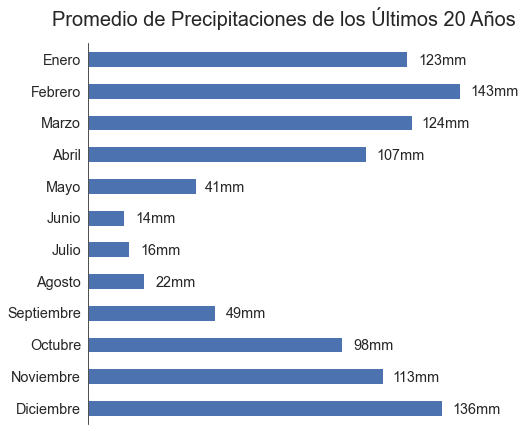

In [41]:
month_avg_20 = data.tail(20).drop('Total', axis=1).mean().iloc[::-1]
month_avg_20.plot.barh(figsize=(7,7))
sns.despine(bottom=True)
plt.title('Promedio de Precipitaciones de los Últimos 20 Años', fontsize=20, y=1.03)
plt.xticks([])
plt.yticks(fontsize='x-large')
for i, v in enumerate([int(round(x)) for x in month_avg_20.values]):
    plt.text(v + 4, i - .17, (str(v) + "mm"), fontsize='x-large')

Decidimos tomar como referencia el promedio de precipitaciones de los últimos 20 años. Estos valores son más representativos de la cantidad de precipitaciones en la actualidad.

- Paso siguiente, recolectaremos los máximos históricos de cada mes.

In [42]:
# Encontrar máximo por mes
max_month = data.max()
max_month

Enero          341
Febrero        368
Marzo          421
Abril          388
Mayo           204
Junio          460
Julio          150
Agosto         124
Septiembre     167
Octubre        308
Noviembre      269
Diciembre      432
Total         1545
dtype: int64

In [43]:
# Confirmar que los máximos no se repiten
data[data == max_month].count()

Enero         1
Febrero       1
Marzo         1
Abril         1
Mayo          1
Junio         1
Julio         1
Agosto        1
Septiembre    1
Octubre       1
Noviembre     1
Diciembre     1
Total         1
dtype: int64

In [44]:
def get_max_month_and_year(col):
    value = col.max() 
    year = col[col == value].index[0]
    return [value, year]
values = list(data.drop(columns='Total').apply(get_max_month_and_year).values)
max_month = pd.DataFrame(values, columns=('Max', 'Año'), index=months)
max_month

,Max,Año
Enero,341,1948
Febrero,368,1939
Marzo,421,1966
Abril,388,1914
Mayo,204,1922
Junio,460,1959
Julio,150,1974
Agosto,124,1913
Septiembre,167,1945
Octubre,308,1939


La tabla muestra el máximo histórico de precipitaciones de cada mes y el año en que ocurrieron.

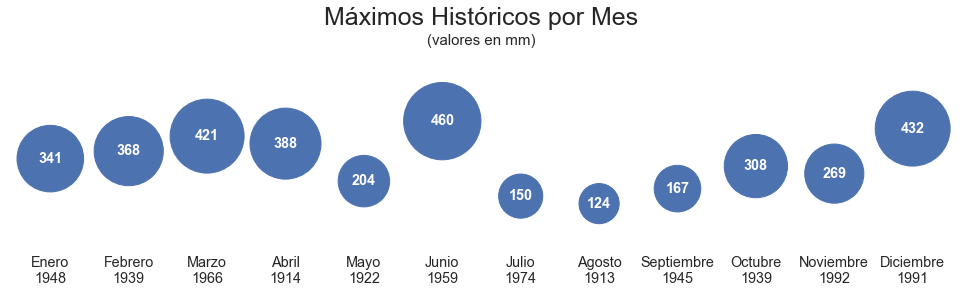

In [45]:
# Get the rank of months by max values
x = max_month.Max
seq = sorted(x)
y = np.array([seq.index(v) for v in x]) / 30

# Creates new ticks for x-axis adding corresponding year to each month
def ticks(row):
    month = row.name
    year = str(row.Año)
    tick = month + '\n' + year
    return tick
ticks_for_x = [x for x in max_month.apply(ticks, axis=1)]
# Create plot
plt.figure(figsize=(17,4))
plt.scatter(max_month.index, y, s=(max_month.Max)*13)
sns.despine(left=True, bottom=True)
plt.title('Máximos Históricos por Mes', fontsize=25)
plt.suptitle('(valores en mm)', 
             x=.512, # x value fixes the issue of suptitle's different centering 
             y=.87, 
             fontsize=15) 
plt.xticks(np.arange(12), ticks_for_x, fontsize='x-large')
plt.yticks([])
plt.ylim(y.min()-.2, y.max()+.4)
for index, value in enumerate(max_month.Max):
    plt.annotate(value, 
                 xy=(index, y[index]), 
                 ha='center', 
                 va='center', 
                 fontsize='x-large', 
                 color='white',
                 weight='bold')
plt.show()

Vemos que los máximos históricos de cada mes siguen, en términos generales, el patrón que también se presenta en el análisis del promedio de lluvias mensuales. Es decir, los valores aumentan en épocas de verano y disminuyen en los meses invernales. 

Solo se observa una excepción a este patrón en el mes de junio que presenta un máximo que supera el de todos los demás meses. Un paso adicional en nuestro análisis podría ser investigar si ese año las precipitaciones fueron realmente tan abundantes. En caso contrario, podríamos concluir en que esto se trataría de un error de registro.

## Condensación de Gráficos

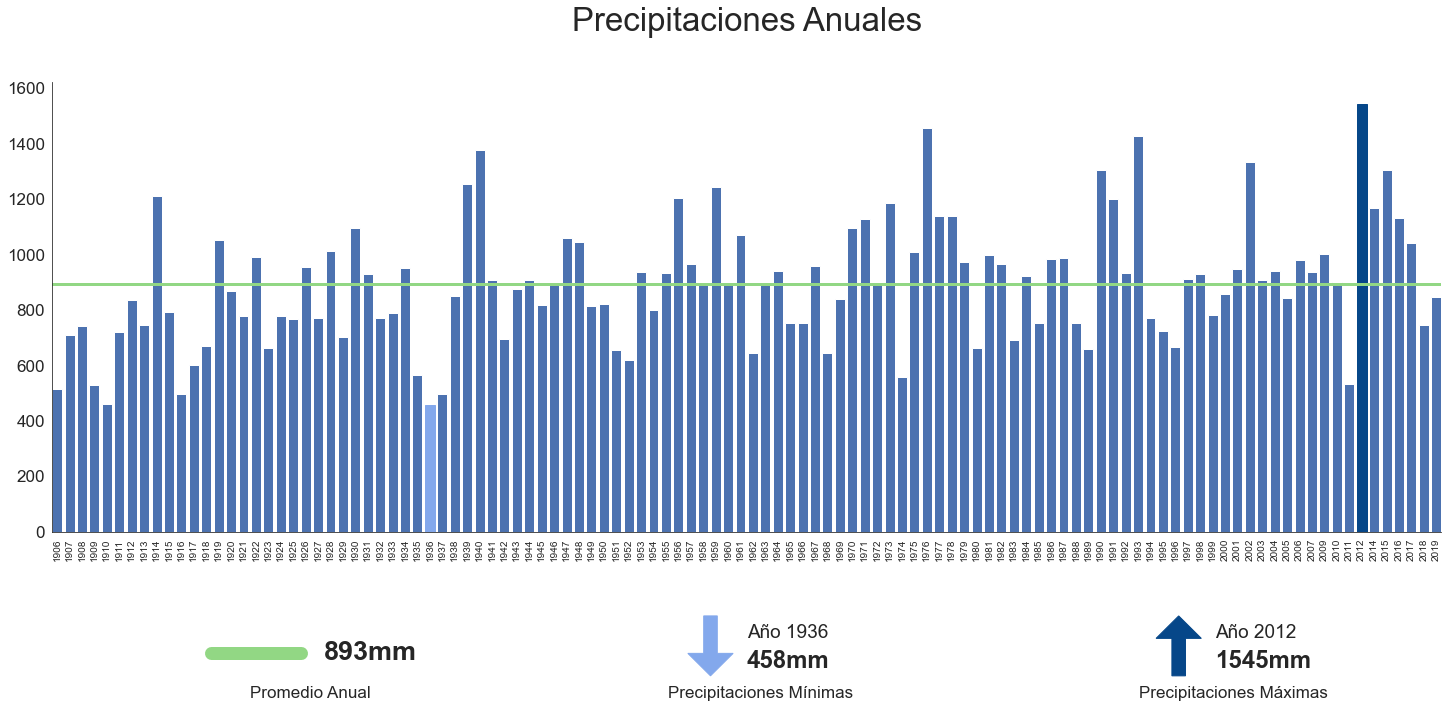

In [46]:
# Preparar la figura
fig = plt.figure(constrained_layout=True, figsize=(20,10))
gs = fig.add_gridspec(4, 3)

# Preparar valores para gráfico principal
x = [str(i) for i in data.index]
y = data.Total
# Encontrar ubicación de valores max y min
min_year = data.index.get_loc(data[data.Total == data.Total.min()].index[0])
max_year = data.index.get_loc(data[data.Total == data.Total.max()].index[0])
avg_year = data.Total.mean()

# Gráfico Principal
ax1 = fig.add_subplot(gs[:3, :])
bars = ax1.bar(x,y)
ax1.autoscale(axis='x', tight=True)
sns.despine(ax=ax1)
ax1.set_title('Precipitaciones Anuales', fontsize=33, y=1.1)
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='y', labelsize=17)

# Promedio de lluvias anuales
ax1.axhline(y=avg_year, xmin=0, xmax=1, c='#92D784', linewidth=3)
# Año de min precipitaciones
bars[min_year].set_color('#83a8ec')
# Año de max precipitaciones
bars[max_year].set_color('#064789')

ax2 = fig.add_subplot(gs[3,0])
ax2.axhline(.45, xmin=.35, xmax=.55, c='#92D784', linewidth=13)
ax2.annotate('893mm', xy=(.6,.45), fontsize=27, weight='bold', va='center')
ax2.annotate('Promedio Anual', xy=(.57,.15), ha='center', fontsize=17)

ax3 = fig.add_subplot(gs[3,1])
ax3.arrow(.42, .7, 0, -.4,
          length_includes_head=True, 
          head_width = 0.1, 
          width = 0.03, 
          color = '#83a8ec') 
ax3.annotate('Año 1936',xy=(.5,.55), fontsize=19)
ax3.annotate('458mm', xy=(.5,.35), fontsize=24, weight='bold')
ax3.annotate('Precipitaciones Mínimas', xy=(.53,.15), ha='center', fontsize=17)

ax4 = fig.add_subplot(gs[3,2])
ax4.arrow(.42, .3, 0, .4,
          length_includes_head=True, 
          head_width = 0.1, 
          width = 0.03, 
          color = '#064789')
ax4.annotate('Año 2012',xy=(.5,.55), fontsize=19)
ax4.annotate('1545mm', xy=(.5,.35), fontsize=24, weight='bold')
ax4.annotate('Precipitaciones Máximas', xy=(.54,.15), ha='center', fontsize=17)

minor_plots = ax2, ax3, ax4
for ax in minor_plots:
#     sns.despine(ax=ax, bottom=True, left=False, right=False)
    sns.despine(ax=ax, bottom=True, left=True)    
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Utilizar esta línea para exportar gráfico como imagen
# plt.savefig('show/Precipitaciones Anuales.png', dpi=400, bbox_inches='tight')
plt.show()

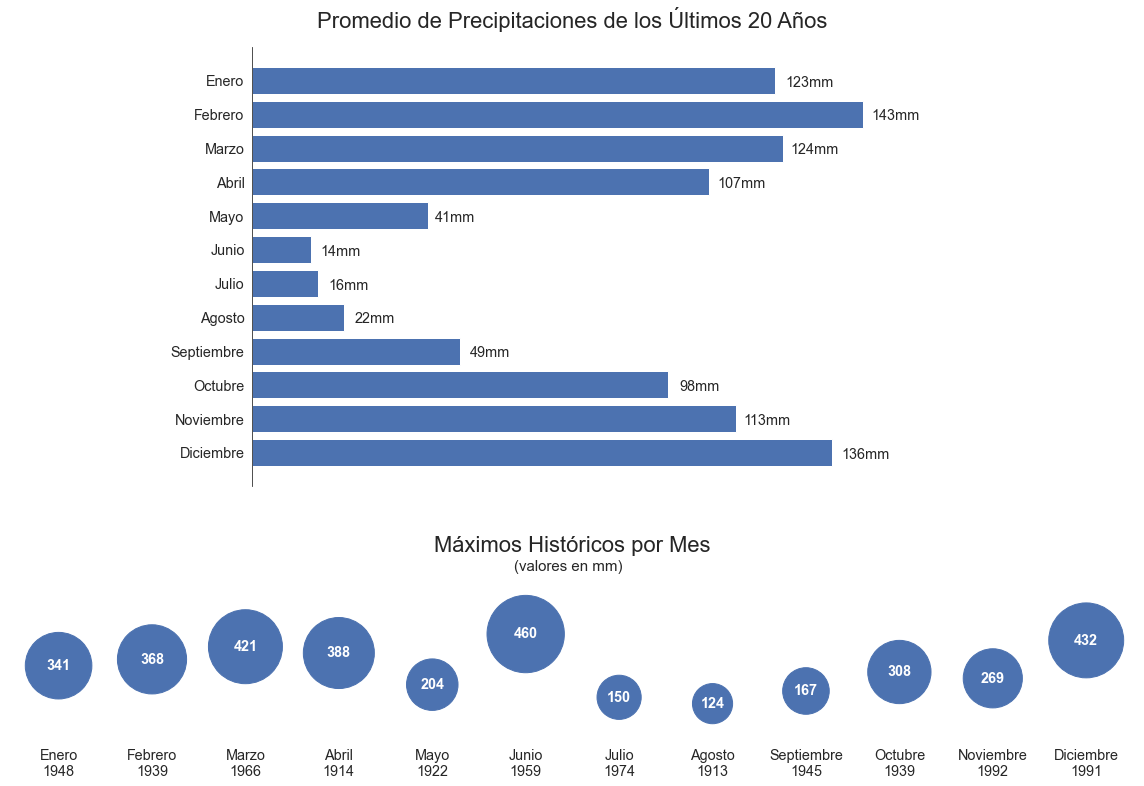

In [47]:
# Preparar la figura
fig2 = plt.figure(constrained_layout=True, figsize=(16,11))
gs = fig2.add_gridspec(3,5)

# Gráfico superior
month_avg_20 = data.tail(20).drop('Total', axis=1).mean().iloc[::-1]
y_months = month_avg_20.index
x_means = month_avg_20.values
fig2_ax1 = fig2.add_subplot(gs[0:2,1:4])
fig2_ax1.barh(y_months,x_means)
sns.despine(bottom=True, ax=fig2_ax1)
fig2_ax1.set_title('Promedio de Precipitaciones de los Últimos 20 Años', fontsize=22, y=1.03)
fig2_ax1.set_xticklabels([])
fig2_ax1.tick_params(axis='y' ,labelsize='x-large')
for i, v in enumerate([int(round(x)) for x in month_avg_20.values]):
    fig2_ax1.text(v + 2, i - .17, (str(v) + "mm"), fontsize='x-large')


# Organizar meses por precipitaciones máximas
max_per_month = max_month.Max
seq = sorted(max_per_month)
y_rank_months = np.array([seq.index(v) for v in max_per_month]) / 30
# Crear ticks para x-axis agregando el año correspondiente
def ticks(row):
    month = row.name
    year = str(row.Año)
    tick = month + '\n' + year
    return tick
ticks_for_x = [x for x in max_month.apply(ticks, axis=1)]
# Gráfico inferior
fig2_ax2 = fig2.add_subplot(gs[2,:])
fig2_ax2.scatter(max_month.index, y_rank_months, s=(max_month.Max)*13)
sns.despine(left=True, bottom=True, ax=fig2_ax2)
fig2_ax2.set_title('Máximos Históricos por Mes', fontsize=22)
fig2_ax2.annotate('(valores en mm)', xy=(4.88,.7), fontsize=15) 
fig2_ax2.set_xticks(np.arange(12))
fig2_ax2.set_xticklabels(ticks_for_x)
fig2_ax2.tick_params(labelsize='x-large')
fig2_ax2.set_yticklabels([])
fig2_ax2.set_ylim(y_rank_months.min()-.2, y_rank_months.max()+.4)
for index, value in enumerate(max_month.Max):
    fig2_ax2.annotate(value, 
                 xy=(index, y_rank_months[index]), 
                 ha='center', 
                 va='center', 
                 fontsize='x-large', 
                 color='white',
                 weight='bold')
    
fig2.tight_layout(h_pad=5)
# Utilizar esta línea para exportar gráfico como imagen
plt.savefig('show/Promedio mensual y Maximos mensuales.png', dpi=400)
plt.show()